In [1]:
%load_ext autoreload
%autoreload 2
from __future__ import division, print_function, absolute_import
import pickle
import glob
import os
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
import numpy as np
from cycler import cycler
%matplotlib inline

from scipy import stats

In [2]:
t_titre = 17 #35
t_label = 12 #25
fig_width = 7 #15

In [3]:
liste = []
for fname in glob.glob('data/*pkl'):
    a = fname.split('/')[1].split('.')[0].split('_')
    liste.append(a)
    print(a)

['pari', 'FM', '2017-09-26', '143606']
['pari', 'LB', '2017-09-19', '152205']
['enregistrement', 'LB', '2017-09-20', '151043']
['pari', 'DC', '2017-09-26', '162348']
['pari', 'IP', '2017-09-26', '122431']
['pari', 'BMC', '2017-09-25', '142503']
['enregistrement', 'IP', '2017-09-28', '115250']
['enregistrement', 'BMC', '2017-09-26', '095637']
['pari', 'CS', '2017-09-28', '154353']
['enregistrement', 'DC', '2017-09-27', '161040']


In [4]:
exp = []
for x in range(len(liste)) :
    if liste[x][0]=='pari' and liste[x][1] in ['BMC','CS','DC','FM','IP','LB'] :
        a = 'data/%s_%s_%s_%s.pkl'%(liste[x][0], liste[x][1],liste[x][2],liste[x][3])
        with open(a, 'rb') as fichier :
            b = pickle.load(fichier, encoding='latin1')
            exp.append(b)

In [5]:
param = []
for x in range(len(liste)) :
    if liste[x][0]=='pari' and liste[x][1] in ['BMC','CS','DC','FM','IP','LB'] :
        a = 'parametre/%s_param_Fit.pkl'%(liste[x][1])
        with open(a, 'rb') as fichier :
            b = pickle.load(fichier, encoding='latin1')
            b['observer'] = liste[x][1]
            param.append(b)

In [6]:
N_blocks = 3
N_trials = 200
full_proba = []
full_results = []
full_va = []
full_bino = []

mean_anti = []
va_mean = []
full_va_mean = []

for x, color in enumerate(['black','darkgrey','grey','rosybrown','darkred','red']):
    p = exp[x]['p']
    proba = p[:,:,1]
    bino = p[:,:,0]
    v_anti = param[x]['v_anti']
    results = (exp[x]['results']+1)/2
    
    va_mean.append([])
    mean_anti.append(np.mean(np.array(param[x]['v_anti'])))
    
    
    for block in range(N_blocks) :
        va_mean[x].append([])
        
        for trial in range(N_trials):
            full_proba.append(proba[trial, block])
            full_results.append(results[trial, block])
            full_va.append(v_anti[block][trial])
            full_bino.append(bino[trial, block])
            
            full_va_mean.append(v_anti[block][trial] - mean_anti[x])
            va_mean[x][block].append(v_anti[block][trial] - mean_anti[x])

### - les 15 premier essais après le switch

In [7]:
proba_switch_x = []
liste_switch_x = []
block_result_switch_x = []
block_v_anti_switch_x = []
proba_x = []
bino_x = []

block_v_anti_switch_x_mean = []

for x in range(len(exp)):

    N_trials = exp[x]['N_trials']
    N_blocks = exp[x]['N_blocks']
    p = exp[x]['p']
    results = (exp[x]['results']+1)/2
    v_anti = param[x]['v_anti']
    
    liste_switch=[]
    proba_switch = []
    result_switch = []
    v_anti_switch = []
    prob = []
    bi = []
    
    v_anti_switch_mean = []
    
    for block in range(N_blocks):

        switch = [0]
        p_switch = [p[0, block, 1]]
        for s in range(N_trials):
            if p[s, block, 2]==1 :
                switch.append(s)
                p_switch.append(p[s, block, 1])
        switch.append(N_trials)

        liste_switch.append(switch)
        proba_switch.append(p_switch)

        #liste_result_switch = []
        #liste_v_anti_switch = []
        #liste_proba = []
        
        for s1 in range(len(switch)-1) :

            for lala in np.arange(switch[s1]+15, switch[s1+1]) :
                result_switch.append(results[lala, block])
                v_anti_switch.append(v_anti[block][lala])
                prob.append(p[lala, block, 1])
                bi.append(p[lala, block, 0])

                v_anti_switch_mean.append(np.array(v_anti[block][lala])-mean_anti[x])
                
    proba_switch_x.append(proba_switch)
    liste_switch_x.append(liste_switch)
    block_result_switch_x.append(result_switch)
    block_v_anti_switch_x.append(v_anti_switch)
    proba_x.append(prob)
    bino_x.append(bi)
    
    block_v_anti_switch_x_mean.append(v_anti_switch_mean)

full_proba_x = []
full_results_x = []
full_va_x = []
full_bino_x = []

full_va_mean_x =[]

for x, color in enumerate(['black','darkgrey','grey','rosybrown','darkred','red']):

    proba = proba_x[x]
    v_anti = block_v_anti_switch_x[x]
    results = block_result_switch_x[x]
    bino = bino_x[x]
    
    v_anti_mean = block_v_anti_switch_x_mean[x]
    
    for trial in range(len(proba)):
        full_proba_x.append(proba[trial])
        full_results_x.append(results[trial])
        full_va_x.append(v_anti[trial])
        full_bino_x.append(bino[trial])
        
        full_va_mean_x.append(v_anti_mean[trial])

## Probabilité réel

FM 2017-09-26_143606 = black
LB 2017-09-19_152205 = darkgrey
DC 2017-09-26_162348 = grey
IP 2017-09-26_122431 = rosybrown
BMC 2017-09-25_142503 = darkred
CS 2017-09-28_154353 = red


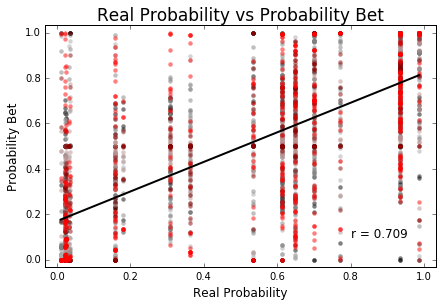

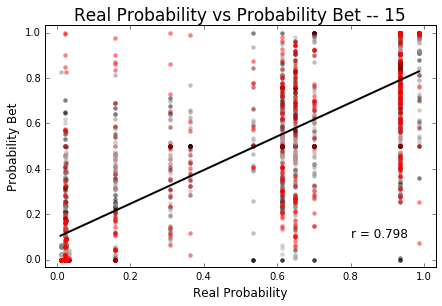

In [8]:
fig, axs = plt.subplots(1, 1, figsize=(fig_width, (fig_width)/1.6180))
fig_x, axs_x = plt.subplots(1, 1, figsize=(fig_width, (fig_width)/1.6180))

axs.axis([-0.032, 1.032, -0.032, 1.032])
axs_x.axis([-0.032, 1.032, -0.032, 1.032])

for x, color in enumerate(['black','darkgrey','grey','rosybrown','darkred','red']):

    p = exp[x]['p']
    results = (exp[x]['results']+1)/2
    print(exp[x]['observer'], exp[x]['timeStr'], '=',color )
    axs.scatter(p[:,:,1], results, c=color, alpha=0.5, linewidths=0)
    
    p_x = proba_x[x]
    results_x = block_result_switch_x[x] #(exp[x]['results']+1)/2

    axs_x.scatter(p_x, results_x, c=color, alpha=0.5, linewidths=0)

slope, intercept, r_value, p_value, std_err = stats.linregress(full_proba, full_results)
x_test = np.linspace(np.min(full_proba), np.max(full_proba), 100)
fitLine = slope * x_test + intercept
axs.plot(x_test, fitLine, c='k', linewidth=2)
axs.text(0.8,0.1, 'r = %0.3f'%(r_value), fontsize=t_label)
axs.set_title("Real Probability vs Probability Bet", fontsize=t_titre)
axs.set_xlabel('Real Probability', fontsize=t_label)
axs.set_ylabel('Probability Bet', fontsize=t_label)


slope_x, intercept_x, r_value_x, p_value_x, std_err_x = stats.linregress(full_proba_x, full_results_x)
x_test_x = np.linspace(np.min(full_proba_x), np.max(full_proba_x), 100)
fitLine_x = slope_x * x_test_x + intercept_x
axs_x.plot(x_test_x, fitLine_x, c='k', linewidth=2)
axs_x.text(0.8,0.1, 'r = %0.3f'%(r_value_x), fontsize=t_label)
axs_x.set_title("Real Probability vs Probability Bet -- 15", fontsize=t_titre)
axs_x.set_xlabel('Real Probability', fontsize=t_label)
axs_x.set_ylabel('Probability Bet', fontsize=t_label)

FM 2017-09-26_143606 = black
LB 2017-09-19_152205 = darkgrey
DC 2017-09-26_162348 = grey
IP 2017-09-26_122431 = rosybrown
BMC 2017-09-25_142503 = darkred
CS 2017-09-28_154353 = red


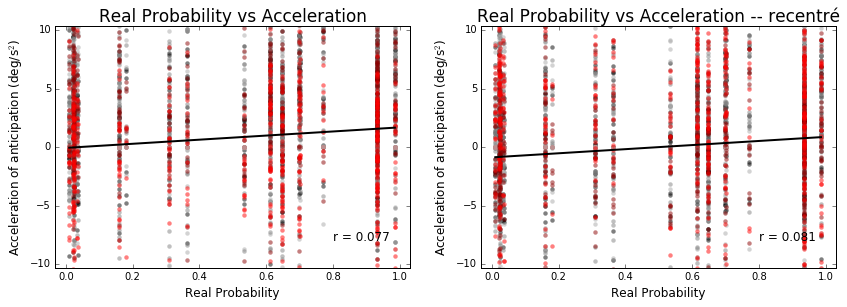

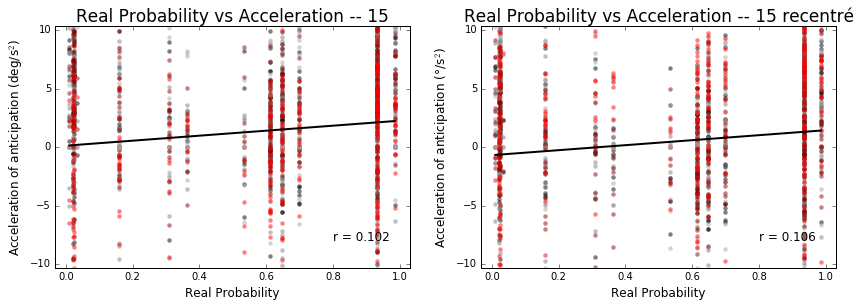

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(fig_width*2, (fig_width)/(1.6180)))
axs[0].axis([-0.032, 1.032, -10.32, 10.32])
#axs[1].axis([-0.1, 1.1, -5, 5])
axs[1].axis([-0.032, 1.032, -10.32, 10.32])

fig_x, axs_x = plt.subplots(1, 2, figsize=(fig_width*2, (fig_width)/(1.6180)))
axs_x[0].axis([-0.032, 1.032, -10.32, 10.32])
axs_x[1].axis([-0.032, 1.032, -10.32, 10.32])

for x, color in enumerate(['black','darkgrey','grey','rosybrown','darkred','red']):
    
    print(exp[x]['observer'], exp[x]['timeStr'], '=',color )
    
    p = exp[x]['p']
    v_anti_0_1 = param[x]['v_anti']
    axs[0].scatter(p[:,:,1], v_anti_0_1, c=color, alpha=0.5, linewidths=0)
    axs[1].scatter(p[:,:,1], va_mean[x], c=color, alpha=0.5, linewidths=0)

    p_x = proba_x[x]
    v_anti_0_1_x = block_v_anti_switch_x[x]
    v_anti_mean = block_v_anti_switch_x_mean[x]
    axs_x[0].scatter(p_x, v_anti_0_1_x, c=color, alpha=0.5, linewidths=0)
    axs_x[1].scatter(p_x, v_anti_mean, c=color, alpha=0.5, linewidths=0)
    
slope, intercept, r_value, p_value, std_err = stats.linregress(full_proba, full_va)
x_test = np.linspace(np.min(full_proba), np.max(full_proba), 100)
fitLine = slope * x_test + intercept
axs[0].plot(x_test, fitLine, c='k', linewidth=2)
axs[0].text(0.8,-8, 'r = %0.3f'%(r_value), fontsize=t_label)
axs[0].set_title("Real Probability vs Acceleration", fontsize=t_titre)
axs[0].set_xlabel('Real Probability', fontsize=t_label)
axs[0].set_ylabel('Acceleration of anticipation (deg/s$^2$)', fontsize=t_label)

slope_c0, intercept_c0, r_value_c0, p_value_c0, std_err_c0 = stats.linregress(full_proba, full_va_mean)
fitLine_c0 = slope_c0 * x_test + intercept_c0
axs[1].plot(x_test, fitLine_c0, c='k', linewidth=2)
axs[1].text(0.8,-8, 'r = %0.3f'%(r_value_c0), fontsize=t_label)
axs[1].set_title("Real Probability vs Acceleration -- recentré", fontsize=t_titre)
axs[1].set_xlabel('Real Probability', fontsize=t_label)
axs[1].set_ylabel('Acceleration of anticipation (deg/s$^2$)', fontsize=t_label)

slope_x, intercept_x, r_value_x, p_value_x, std_err_x = stats.linregress(full_proba_x, full_va_x)
x_test_x = np.linspace(np.min(full_proba_x), np.max(full_proba_x), 100)
fitLine_x = slope_x * x_test_x + intercept_x
axs_x[0].plot(x_test_x, fitLine_x, c='k', linewidth=2)
axs_x[0].text(0.8,-8, 'r = %0.3f'%(r_value_x), fontsize=t_label)
axs_x[0].set_title("Real Probability vs Acceleration -- 15", fontsize=t_titre)
axs_x[0].set_xlabel('Real Probability', fontsize=t_label)
axs_x[0].set_ylabel('Acceleration of anticipation (deg/s$^2$)', fontsize=t_label)
    
slope_c0_x, intercept_c0_x, r_value_c0_x, p_value_c0_x, std_err_c0_x = stats.linregress(full_proba_x, full_va_mean_x)
fitLine_c0_x = slope_c0_x * x_test_x + intercept_c0_x
axs_x[1].plot(x_test_x, fitLine_c0_x, c='k', linewidth=2)
axs_x[1].text(0.8,-8, 'r = %0.3f'%(r_value_c0_x), fontsize=t_label)
axs_x[1].set_title("Real Probability vs Acceleration -- 15 recentré", fontsize=t_titre)
axs_x[1].set_xlabel('Real Probability', fontsize=t_label)
axs_x[1].set_ylabel('Acceleration of anticipation (°/s$^2$)', fontsize=t_label)

FM 2017-09-26_143606 = black
LB 2017-09-19_152205 = darkgrey
DC 2017-09-26_162348 = grey
IP 2017-09-26_122431 = rosybrown
BMC 2017-09-25_142503 = darkred
CS 2017-09-28_154353 = red


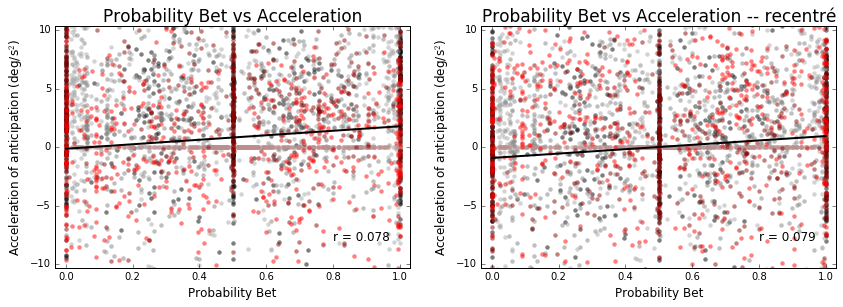

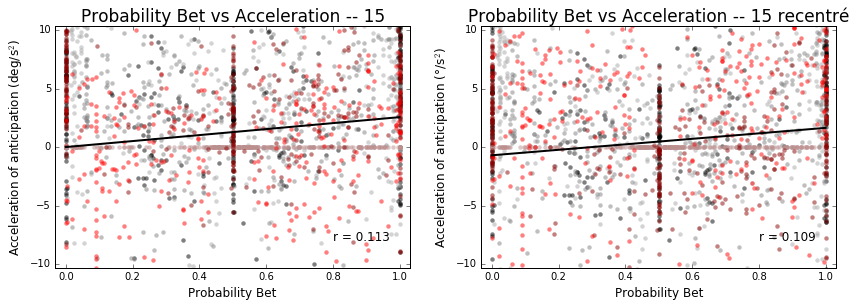

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(fig_width*2, (fig_width)/(1.6180)))
axs[0].axis([-0.032, 1.032, -10.32, 10.32])
axs[1].axis([-0.032, 1.032, -10.32, 10.32])

fig_x, axs_x = plt.subplots(1, 2, figsize=(fig_width*2, (fig_width)/(1.6180)))
axs_x[0].axis([-0.032, 1.032, -10.32, 10.32])
axs_x[1].axis([-0.032, 1.032, -10.32, 10.32])

for x, color in enumerate(['black','darkgrey','grey','rosybrown','darkred','red']):
    
    print(exp[x]['observer'], exp[x]['timeStr'], '=',color )
    
    results = (exp[x]['results']+1)/2 # results est sur [-1,1] on le ramene sur [0,1]
    v_anti_0_1 = param[x]['v_anti']
    axs[0].scatter(results, v_anti_0_1, c=color, alpha=0.5, linewidths=0)
    axs[1].scatter(results, va_mean[x], c=color, alpha=0.5, linewidths=0)
    
    results_x = block_result_switch_x[x] #(exp[x]['results']+1)/2
    v_anti_0_1_x = block_v_anti_switch_x[x] 
    v_anti_mean = block_v_anti_switch_x_mean[x]
    axs_x[0].scatter(results_x, v_anti_0_1_x, c=color, alpha=0.5, linewidths=0)
    axs_x[1].scatter(results_x, v_anti_mean, c=color, alpha=0.5, linewidths=0)
    
    
slope, intercept, r_value, p_value, std_err = stats.linregress(full_results, full_va)
x_test = np.linspace(np.min(full_results), np.max(full_results), 100)
fitLine = slope * x_test + intercept
axs[0].plot(x_test, fitLine, c='k', linewidth=2)
axs[0].text(0.8,-8, 'r = %0.3f'%(r_value), fontsize=t_label)
axs[0].set_title("Probability Bet vs Acceleration", fontsize=t_titre)
axs[0].set_xlabel('Probability Bet', fontsize=t_label)
axs[0].set_ylabel('Acceleration of anticipation (deg/s$^2$)', fontsize=t_label)
 
slope_c0, intercept_c0, r_value_c0, p_value_c0, std_err_c0 = stats.linregress(full_results, full_va_mean)
fitLine_c0 = slope_c0 * x_test + intercept_c0
axs[1].plot(x_test, fitLine_c0, c='k', linewidth=2)
axs[1].text(0.8,-8, 'r = %0.3f'%(r_value_c0), fontsize=t_label)
axs[1].set_title("Probability Bet vs Acceleration -- recentré", fontsize=t_titre)
axs[1].set_xlabel('Probability Bet', fontsize=t_label)
axs[1].set_ylabel('Acceleration of anticipation (deg/s$^2$)', fontsize=t_label)
    
    
slope_x, intercept_x, r_value_x, p_value_x, std_err_x = stats.linregress(full_results_x, full_va_x)
x_test_x = np.linspace(np.min(full_results_x), np.max(full_results_x), 100)
fitLine_x = slope_x * x_test_x + intercept_x
axs_x[0].plot(x_test_x, fitLine_x, c='k', linewidth=2)
axs_x[0].text(0.8,-8, 'r = %0.3f'%(r_value_x), fontsize=t_label)
axs_x[0].set_title("Probability Bet vs Acceleration -- 15", fontsize=t_titre)
axs_x[0].set_xlabel('Probability Bet', fontsize=t_label)
axs_x[0].set_ylabel('Acceleration of anticipation (deg/s$^2$)', fontsize=t_label)

    
slope_c0_x, intercept_c0_x, r_value_c0_x, p_value_c0_x, std_err_c0_x = stats.linregress(full_results_x, full_va_mean_x)
fitLine_c0_x = slope_c0_x * x_test_x + intercept_c0_x
axs_x[1].plot(x_test_x, fitLine_c0_x, c='k', linewidth=2)
axs_x[1].text(0.8,-8, 'r = %0.3f'%(r_value_c0_x), fontsize=t_label)
axs_x[1].set_title("Probability Bet vs Acceleration -- 15 recentré", fontsize=t_titre)
axs_x[1].set_xlabel('Probability Bet', fontsize=t_label)
axs_x[1].set_ylabel('Acceleration of anticipation (°/s$^2$)', fontsize=t_label)

## Probabilité estimé

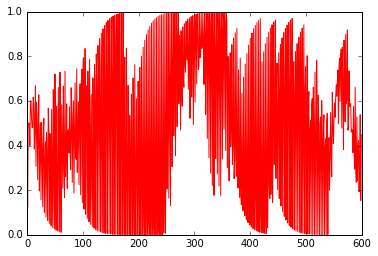

In [14]:
def moving_ave(list_D, tau, p_init=.5, delta=0):
    """
    This function is an agent that infer a P contengencie in function of a pre-established list_D of
    either rightward or leftward trials. p_init means we start from a prior of 50% chance for a target
    to go to each size. Delta = roll
    """
    list_p = p_init*np.ones_like(list_D)
    for i, D in enumerate(list_D[:-1]):
        list_p[i+1] = (1 -  1/tau)*list_p[i] + 1/tau * D
    return np.roll(list_p, delta).flatten()
ploup = exp[0]['p']
plt.plot(moving_ave(ploup[:,:,0], tau=5, delta=2), c='r')

FM 2017-09-26_143606 = black
LB 2017-09-19_152205 = darkgrey
DC 2017-09-26_162348 = grey
IP 2017-09-26_122431 = rosybrown
BMC 2017-09-25_142503 = darkred
CS 2017-09-28_154353 = red


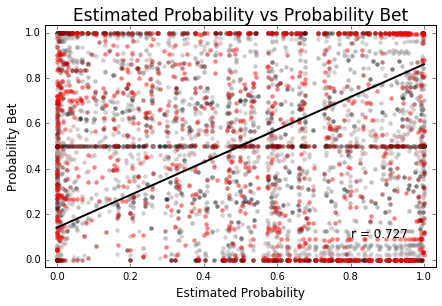

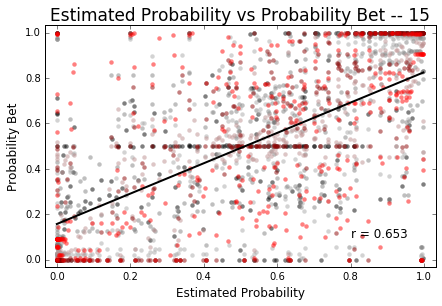

In [19]:
fig, axs = plt.subplots(1, 1, figsize=(fig_width, (fig_width)/1.6180))
axs.axis([-0.032, 1.032, -0.032, 1.032])

fig_x, axs_x = plt.subplots(1, 1, figsize=(fig_width, (fig_width)/1.6180))
axs_x.axis([-0.032, 1.032, -0.032, 1.032])

for x, color in enumerate(['black','darkgrey','grey','rosybrown','darkred','red']):

    p = exp[x]['p']
    results = (exp[x]['results']+1)/2 
    print(exp[x]['observer'], exp[x]['timeStr'], '=',color )
    axs.scatter(moving_ave(p[:,:,0], tau=5, delta=2), results, c=color, alpha=0.5,linewidths=0)

    binoX = bino_x[x]
    results_x = block_result_switch_x[x] #(exp[x]['results']+1)/2
    axs_x.scatter(moving_ave(binoX, tau=5, delta=2), results_x, c=color, alpha=0.5, linewidths=0)
    
slope, intercept, r_value, p_value, std_err = stats.linregress(moving_ave(full_bino, tau=5, delta=2), full_results)
x_test = np.linspace(np.min(moving_ave(full_bino, tau=5, delta=2)), np.max(moving_ave(full_bino, tau=5, delta=2)), 100)
fitLine = slope * x_test + intercept
axs.plot(x_test, fitLine, c='k', linewidth=2)
axs.text(0.8,0.1, 'r = %0.3f'%(r_value), fontsize=t_label)
axs.set_title(r'Estimated Probability vs Probability Bet', fontsize=t_titre)
axs.set_xlabel(r'Estimated Probability', fontsize=t_label)
axs.set_ylabel('Probability Bet', fontsize=t_label)


slope_x, intercept_x, r_value_x, p_value_x, std_err_x = stats.linregress(moving_ave(full_bino_x, tau=5, delta=2), full_results_x)
x_test_x = np.linspace(np.min(moving_ave(full_bino_x, tau=5, delta=2)), np.max(moving_ave(full_bino_x, tau=5, delta=2)), 100)
fitLine_x = slope_x * x_test_x + intercept_x
axs_x.plot(x_test_x, fitLine_x, c='k', linewidth=2)
axs_x.text(0.8,0.1, 'r = %0.3f'%(r_value_x), fontsize=t_label)
axs_x.set_title("Estimated Probability vs Probability Bet -- 15", fontsize=t_titre)
axs_x.set_xlabel('Estimated Probability', fontsize=t_label)
axs_x.set_ylabel('Probability Bet', fontsize=t_label)

FM 2017-09-26_143606 = black
LB 2017-09-19_152205 = darkgrey
DC 2017-09-26_162348 = grey
IP 2017-09-26_122431 = rosybrown
BMC 2017-09-25_142503 = darkred
CS 2017-09-28_154353 = red


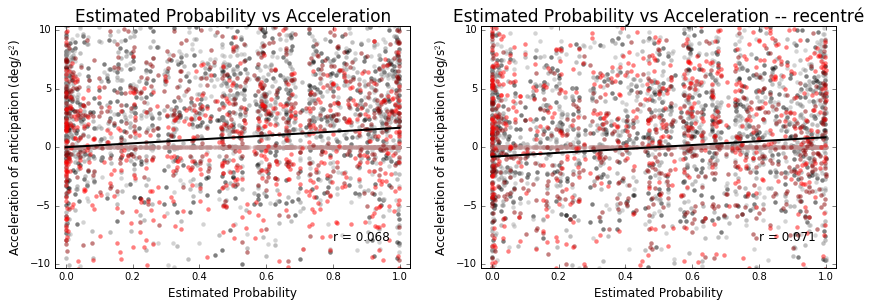

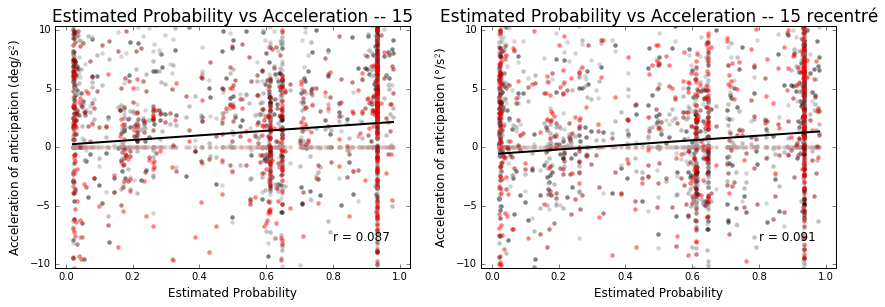

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(fig_width*2, (fig_width)/(1.6180)))
axs[0].axis([-0.032, 1.032, -10.32, 10.32])
axs[1].axis([-0.032, 1.032, -10.32, 10.32])

fig_x, axs_x = plt.subplots(1, 2, figsize=(fig_width*2, (fig_width)/(1.6180)))
axs_x[0].axis([-0.032, 1.032, -10.32, 10.32])
axs_x[1].axis([-0.032, 1.032, -10.32, 10.32])



for x, color in enumerate(['black','darkgrey','grey','rosybrown','darkred','red']):
    
    print(exp[x]['observer'], exp[x]['timeStr'], '=',color )
    p = exp[x]['p']
    v_anti_0_1 = param[x]['v_anti']
    axs[0].scatter(moving_ave(p[:,:,0], tau=5, delta=2), v_anti_0_1, c=color, alpha=0.5, linewidths=0)
    axs[1].scatter(moving_ave(p[:,:,0], tau=5, delta=2), va_mean[x], c=color, alpha=0.5, linewidths=0)
    
    p_x = proba_x[x]
    v_anti_x = block_v_anti_switch_x[x]
    v_anti_mean = block_v_anti_switch_x_mean[x]
    axs_x[0].scatter(moving_ave(p_x, tau=5, delta=2), v_anti_x, c=color, alpha=0.5, linewidths=0)
    axs_x[1].scatter(moving_ave(p_x, tau=5, delta=2), v_anti_mean, c=color, alpha=0.5, linewidths=0)
    
    
slope, intercept, r_value, p_value, std_err = stats.linregress(moving_ave(full_bino, tau=5, delta=2), full_va)
x_test = np.linspace(np.min(moving_ave(full_bino, tau=5, delta=2)), np.max(moving_ave(full_bino, tau=5, delta=2)), 100)
fitLine = slope * x_test + intercept
axs[0].plot(x_test, fitLine, c='k', linewidth=2)
axs[0].text(0.8,-8, 'r = %0.3f'%(r_value), fontsize=t_label)
axs[0].set_title("Estimated Probability vs Acceleration", fontsize=t_titre)
axs[0].set_xlabel('Estimated Probability', fontsize=t_label)
axs[0].set_ylabel('Acceleration of anticipation (deg/s$^2$)', fontsize=t_label)

slope_c0, intercept_c0, r_value_c0, p_value_c0, std_err_c0 = stats.linregress(moving_ave(full_bino, tau=5, delta=2), full_va_mean)
fitLine_c0 = slope_c0 * x_test + intercept_c0
axs[1].plot(x_test, fitLine_c0, c='k', linewidth=2)
axs[1].text(0.8,-8, 'r = %0.3f'%(r_value_c0), fontsize=t_label)
axs[1].set_title("Estimated Probability vs Acceleration -- recentré", fontsize=t_titre)
axs[1].set_xlabel('Estimated Probability', fontsize=t_label)
axs[1].set_ylabel('Acceleration of anticipation (deg/s$^2$)', fontsize=t_label)


slope_x, intercept_x, r_value_x, p_value_x, std_err_x = stats.linregress(moving_ave(full_proba_x, tau=5, delta=2), full_va_x)
x_test_x = np.linspace(np.min(moving_ave(full_proba_x, tau=5, delta=2)), np.max(moving_ave(full_proba_x, tau=5, delta=2)), 100)
fitLine_x = slope_x * x_test_x + intercept_x
axs_x[0].plot(x_test_x, fitLine_x, c='k', linewidth=2)
axs_x[0].text(0.8,-8, 'r = %0.3f'%(r_value_x), fontsize=t_label)
axs_x[0].set_title("Estimated Probability vs Acceleration -- 15", fontsize=t_titre)
axs_x[0].set_xlabel('Estimated Probability', fontsize=t_label)
axs_x[0].set_ylabel('Acceleration of anticipation (deg/s$^2$)', fontsize=t_label)

slope_c0_x, intercept_c0_x, r_value_c0_x, p_value_c0_x, std_err_c0_x = stats.linregress(moving_ave(full_proba_x, tau=5, delta=2), full_va_mean_x)
fitLine_c0_x = slope_c0_x * x_test_x + intercept_c0_x
axs_x[1].plot(x_test_x, fitLine_c0_x, c='k', linewidth=2)
axs_x[1].text(0.8,-8, 'r = %0.3f'%(r_value_c0_x), fontsize=t_label)
axs_x[1].set_title("Estimated Probability vs Acceleration -- 15 recentré", fontsize=t_titre)
axs_x[1].set_xlabel('Estimated Probability', fontsize=t_label)
axs_x[1].set_ylabel('Acceleration of anticipation (°/s$^2$)', fontsize=t_label)

# Autre Test

In [14]:
proba_switch_x = []
liste_switch_x = []
block_result_switch_x = []
block_v_anti_switch_x = []

block_m_result_switch_x = []
block_m_v_anti_switch_x = []
block_std_result_switch_x = []
block_std_v_anti_switch_x = []

for x in range(len(exp)):

    N_trials = exp[x]['N_trials']
    N_blocks = exp[x]['N_blocks']
    p = exp[x]['p']
    results = (exp[x]['results']+1)/2 # results est sur [-1,1] on le ramene sur [0,1]
    v_anti_0_1 = param[x]['v_anti']
    
    
    proba_switch = []
    liste_switch = []
    block_result_switch = []
    block_v_anti_switch = []

    block_m_result_switch = []
    block_m_v_anti_switch = []
    block_std_result_switch = []
    block_std_v_anti_switch = []
    for block in range(N_blocks):

        switch = [0]
        p_switch = [p[0, block, 1]]
        for s in range(N_trials):
            if p[s, block, 2]==1 :
                switch.append(s)
                p_switch.append(p[s, block, 1])
        switch.append(N_trials)

        liste_switch.append(switch)
        proba_switch.append(p_switch)

        liste_result_switch = []
        liste_v_anti_switch = []

        liste_m_result_switch = []
        liste_m_v_anti_switch = []
        liste_std_result_switch = []
        liste_std_v_anti_switch = []
        
        for s1 in range(len(switch)-1) :
            result_switch = results[switch[s1]:switch[s1+1], block]
            v_anti_switch = v_anti_0_1[block][switch[s1]:switch[s1+1]]

            liste_result_switch.append(result_switch)
            liste_v_anti_switch.append(v_anti_switch)

            m_result_switch = np.mean(results[switch[s1]:switch[s1+1], block])
            m_v_anti_switch = np.mean(v_anti_0_1[block][switch[s1]:switch[s1+1]])*100
            
            std_result_switch = np.std(results[switch[s1]:switch[s1+1],block])
            std_v_anti_switch = np.std(v_anti_0_1[block][switch[s1]:switch[s1+1]])*100
            
            liste_m_result_switch.append(m_result_switch)
            liste_m_v_anti_switch.append(m_v_anti_switch)
            liste_std_result_switch.append(std_result_switch)
            liste_std_v_anti_switch.append(std_v_anti_switch)

        block_result_switch.append(liste_result_switch)
        block_v_anti_switch.append(liste_v_anti_switch)

        block_m_result_switch.append(liste_m_result_switch)
        block_m_v_anti_switch.append(liste_m_v_anti_switch)
        block_std_result_switch.append(liste_std_result_switch)
        block_std_v_anti_switch.append(liste_std_v_anti_switch)
    
    proba_switch_x.append(proba_switch)
    liste_switch_x.append(liste_switch)
    block_result_switch_x.append(block_result_switch)
    block_v_anti_switch_x.append(block_v_anti_switch)

    block_m_result_switch_x.append(block_m_result_switch)
    block_m_v_anti_switch_x.append(block_m_v_anti_switch)
    block_std_result_switch_x.append(block_std_result_switch)
    block_std_v_anti_switch_x.append(block_std_v_anti_switch)

FM 2017-09-26_143606 = black
LB 2017-09-19_152205 = darkgrey
DC 2017-09-26_162348 = grey
IP 2017-09-26_122431 = rosybrown
BMC 2017-09-25_142503 = darkred
CS 2017-09-28_154353 = red


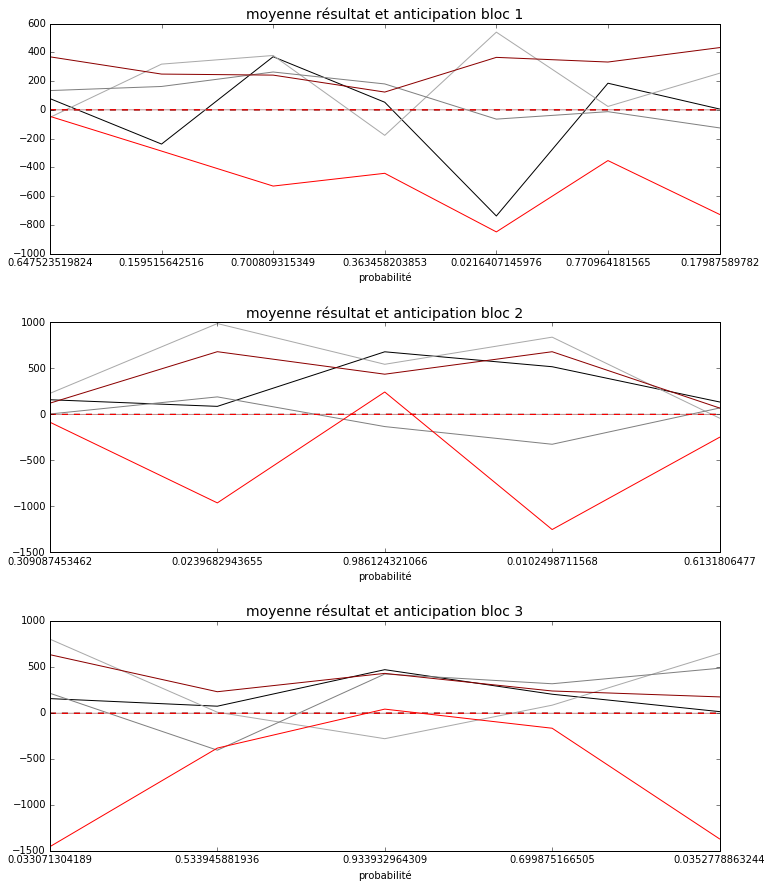

In [15]:
fig_width = 12
fig, axs = plt.subplots(3, 1, figsize=(fig_width, (fig_width*2)/(1.6180)))
fig.subplots_adjust(hspace=0.3)

for x, color in enumerate(['black','darkgrey','grey','rosybrown','darkred','red']):

    print(exp[x]['observer'], exp[x]['timeStr'], '=',color )
    
    dic = {}
    N_blocks = exp[x]['N_blocks']
    
    for block in range(N_blocks):

        axs[block].errorbar(range(len(proba_switch_x[x][block])), block_m_result_switch_x[x][block], c=color, linestyle='dashed') #, yerr=block_std_result_switch_x[x][block] 
        axs[block].errorbar(range(len(proba_switch_x[x][block])), block_m_v_anti_switch_x[x][block], c=color) # ,yerr=block_std_v_anti_switch_x[x][block]

        axs[block].set_xticks(np.arange(len(proba_switch_x[x][block])))
        axs[block].set_xticklabels(proba_switch_x[x][block])
        axs[block].set_title('moyenne résultat et anticipation bloc %s'%(block+1), fontsize=14)
        axs[block].set_xlabel('probabilité')

FM 2017-09-26_143606 = black
LB 2017-09-19_152205 = darkgrey
DC 2017-09-26_162348 = grey
IP 2017-09-26_122431 = rosybrown
BMC 2017-09-25_142503 = darkred
CS 2017-09-28_154353 = red


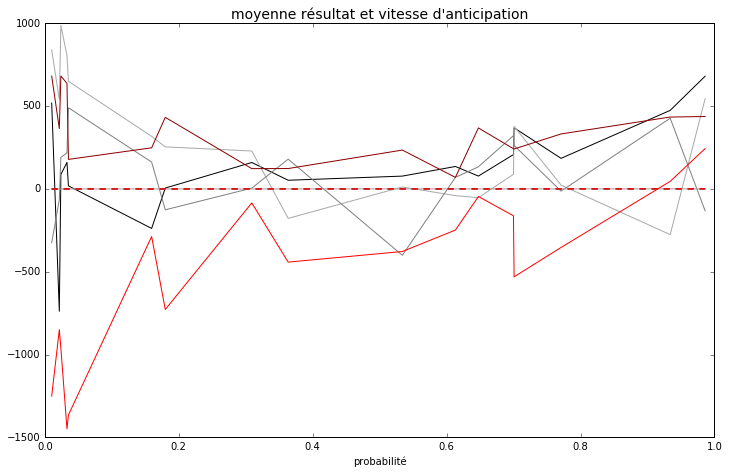

In [16]:
fig_width= 12
fig, axs = plt.subplots(1, 1, figsize=(fig_width, (fig_width)/1.6180))

for x, color in enumerate(['black','darkgrey','grey','rosybrown','darkred','red']):
    
    print(exp[x]['observer'], exp[x]['timeStr'], '=',color )
    
    dic_m_result = {}
    dic_m_v_anti = {}
    dic_std_result = {}
    dic_std_v_anti = {}
    
    for block in range(N_blocks):
        #print('block', block)
        for s1 in range(len(proba_switch_x[x][block])) :
            dic_m_result[proba_switch_x[x][block][s1]] = block_m_result_switch_x[x][block][s1]
            dic_m_v_anti[proba_switch_x[x][block][s1]] = block_m_v_anti_switch_x[x][block][s1]
            dic_std_result[proba_switch_x[x][block][s1]] = block_std_result_switch_x[x][block][s1]
            dic_std_v_anti[proba_switch_x[x][block][s1]] = block_std_v_anti_switch_x[x][block][s1]
            #print(s1, proba_switch[block][s1], np.correlate(block_result_switch[block][s1], block_v_anti_switch[block][s1])[0])#[0][1])

    m_res = sorted(dic_m_result.items())
    proba = []
    moyenne_resul = []
    m_anti = sorted(dic_m_v_anti.items())
    moyenne_anti = []

    std_res = sorted(dic_std_result.items())
    std_resul = []
    std_anti = sorted(dic_std_v_anti.items())
    std_v_anti = []
    
    for x in range(len(m_res)):
        proba.append(m_res[x][0])
        moyenne_resul.append(m_res[x][1])
        moyenne_anti.append(m_anti[x][1])
        
        std_resul.append(std_res[x][1])
        std_v_anti.append(std_anti[x][1])
        
    #print("\nproba dans l'ordre = ", proba)
    #print("\ncorrelation dans l'ordre = ", correlation)
    plt.errorbar(proba, moyenne_resul, linestyle='dashed', c=color) # , yerr=std_resul
    plt.errorbar(proba, moyenne_anti, c=color) # , yerr=std_v_anti
    plt.title("moyenne résultat et vitesse d'anticipation", fontsize=14)
    plt.xlabel('probabilité')

FM 2017-09-26_143606 = black
LB 2017-09-19_152205 = darkgrey
DC 2017-09-26_162348 = grey
IP 2017-09-26_122431 = rosybrown
BMC 2017-09-25_142503 = darkred
CS 2017-09-28_154353 = red


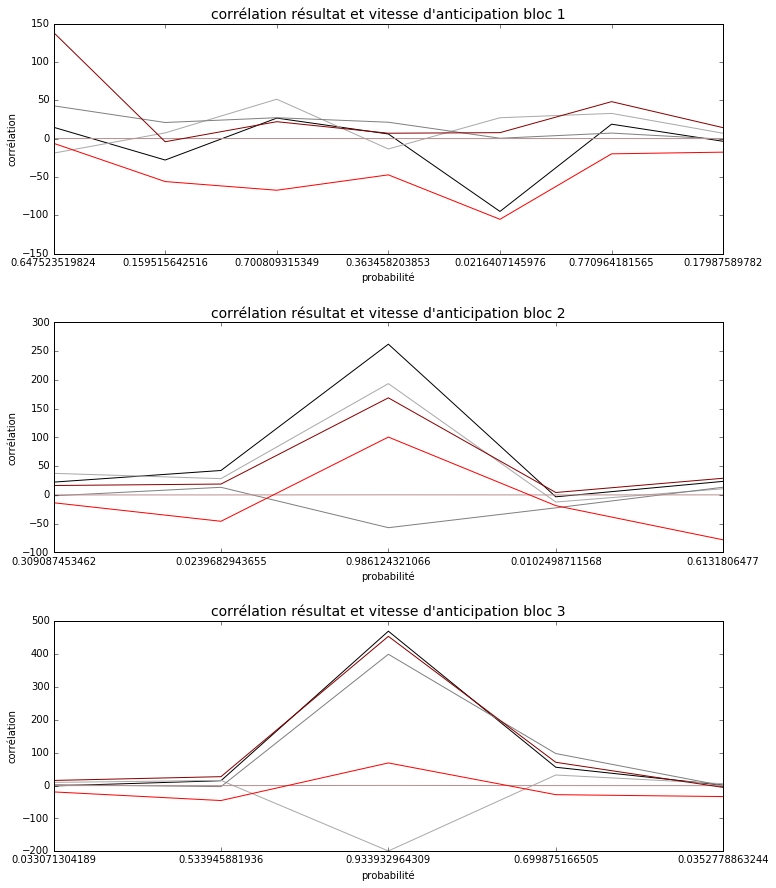

In [17]:
fig_width= 12
fig, axs = plt.subplots(3, 1, figsize=(fig_width, (fig_width*2)/1.6180))
fig.subplots_adjust(hspace=0.3)

for x, color in enumerate(['black','darkgrey','grey','rosybrown','darkred','red']):
    
    print(exp[x]['observer'], exp[x]['timeStr'], '=',color )
    
    dic = {}
    N_blocks = exp[x]['N_blocks']
    
    for block in range(N_blocks):
        #print('block', block)
        corr = []
        for s1 in range(len(proba_switch_x[x][block])) :
            dic[proba_switch_x[x][block][s1]] = np.correlate(block_result_switch_x[x][block][s1], block_v_anti_switch_x[x][block][s1])[0]
            #print(s1, proba_switch_x[x][block][s1], np.correlate(block_result_switch_x[x][block][s1], block_v_anti_switch_x[x][block][s1])[0])#[0][1])
            corr.append(np.correlate(block_result_switch_x[x][block][s1], block_v_anti_switch_x[x][block][s1])[0])#[1])
        axs[block].plot(corr, c=color)
        axs[block].set_xticks(np.arange(len(proba_switch_x[x][block])))
        axs[block].set_xticklabels(proba_switch_x[x][block])
        axs[block].set_title("corrélation résultat et vitesse d'anticipation bloc %s"%(block+1), fontsize=14)
        axs[block].set_xlabel('probabilité')
        axs[block].set_ylabel('corrélation')

FM 2017-09-26_143606 = black
LB 2017-09-19_152205 = darkgrey
DC 2017-09-26_162348 = grey
IP 2017-09-26_122431 = rosybrown
BMC 2017-09-25_142503 = darkred
CS 2017-09-28_154353 = red


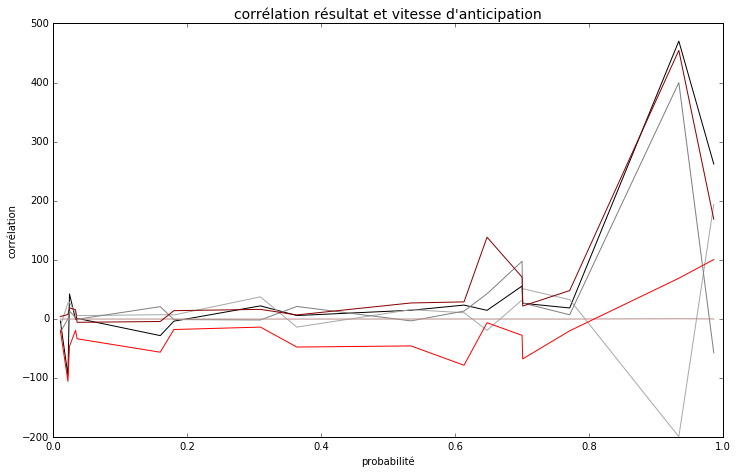

In [18]:
#fig_width = 20
fig, axs = plt.subplots(1, 1, figsize=(fig_width, (fig_width)/1.6180))

for x, color in enumerate(['black','darkgrey','grey','rosybrown','darkred','red']):
    
    print(exp[x]['observer'], exp[x]['timeStr'], '=',color )
    
    dic_corr = {}
    N_blocks = exp[x]['N_blocks']
    for block in range(N_blocks):
        #print('block', block)
        for s1 in range(len(proba_switch_x[x][block])) :
            dic_corr[proba_switch_x[x][block][s1]] = np.correlate(block_result_switch_x[x][block][s1], block_v_anti_switch_x[x][block][s1])[0]
            #print(s1, proba_switch_x[x][block][s1], np.correlate(block_result_switch_x[x][block][s1], block_v_anti_switch_x[x][block][s1])[0])#[0][1])

    corr = sorted(dic_corr.items())
    proba = []
    correlation = []
    for x in range(len(corr)):
        proba.append(corr[x][0])
        correlation.append(corr[x][1])
    #print("\nproba dans l'ordre = ", proba)
    #print("\ncorrelation dans l'ordre = ", correlation)
    plt.plot(proba, correlation, c=color)
    plt.title("corrélation résultat et vitesse d'anticipation", fontsize=14)
    plt.ylabel('corrélation')
    plt.xlabel('probabilité')